# Author : Anand Veerarahavan


# Importing the libraries

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importing the dataset

In [36]:
data = sns.load_dataset('diamonds')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Check for empty data

In [37]:
data.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


# Fixing dependent and independent columns(Features)

In [38]:
df_num = data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
df_num

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


# Pre-processing 

In [39]:
standard_num = preprocessing.scale(df_num)
df_num_std = pd.DataFrame(standard_num, columns=df_num.columns)
df_num_std

,carat,depth,table,price,x,y,z
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135
53938,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204


In [40]:
features = df_num_std[['carat', 'depth', 'table', 'x', 'y', 'z']]
target = df_num_std['price']

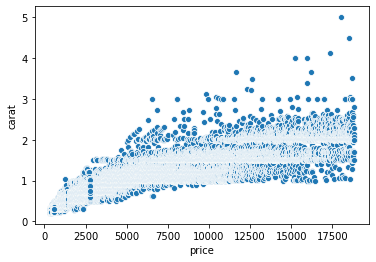

In [41]:
ax = sns.scatterplot(x='price',y='carat', data=data)

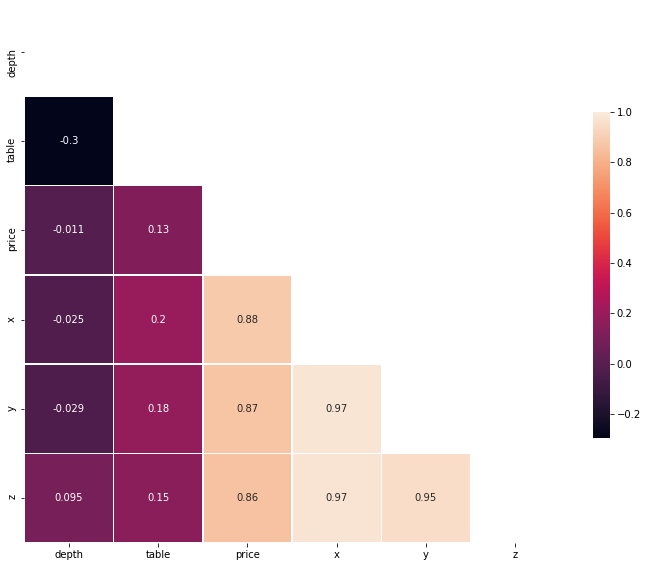

In [42]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

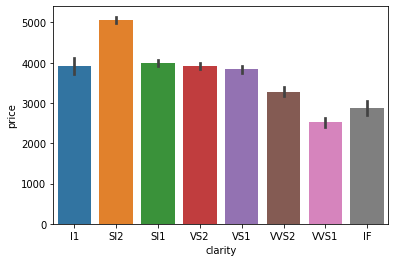

In [43]:
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=data)

# Splitting Training and Test Data

In [44]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=1/3)

# Linear Regression

In [45]:
reg = LinearRegression()
model = reg.fit(train_x, train_y)
print('Model Coefficient', model.coef_)
print('Model Intercept : ', model.intercept_)
predicted_y = model.predict(test_x)

Model Coefficient [ 1.25386274 -0.06949008 -0.05739003 -0.35130806  0.01226331  0.00952116]
Model Intercept :  -0.0002794891358649785


In [46]:
MSE_train = mean_squared_error(train_y, model.predict(train_x))
MSE_test = mean_squared_error(test_y, predicted_y)
rmse=np.sqrt(mean_squared_error(test_y,predicted_y))

print('MSE Train : ', MSE_train)
print('MSE Test : ', MSE_test)
print("rmse: %f" %(rmse))

MSE Train :  0.13909013427653744
MSE Test :  0.1442377002628008
rmse: 0.379786


# Result :
Thus the Model Coefficient, Model Intercept , RMSE and Mean squared error are found .
Features used are carat, depth , table, price , x, y and z.
